In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [466]:
df_water = pd.read_csv('weather_conditions/water_current.csv')
df_water['speed'] = df_water[' Speed (cm/sec)'].astype(float) / 100
df_water['dir'] = df_water[' Dir (true)'].astype(float)
df_water['date'] = pd.to_datetime(df_water['Date/Time'])
df_water['day'] = df_water['date'].dt.day
df_water

,Date/Time,Speed (cm/sec),Dir (true),speed,dir,date,day
0,2023-08-01 00:03:00,17.9,269,0.179,269.0,2023-08-01 00:03:00,1
1,2023-08-01 00:09:00,20.0,263,0.200,263.0,2023-08-01 00:09:00,1
2,2023-08-01 00:15:00,18.8,238,0.188,238.0,2023-08-01 00:15:00,1
3,2023-08-01 00:21:00,21.1,233,0.211,233.0,2023-08-01 00:21:00,1
4,2023-08-01 00:27:00,16.9,232,0.169,232.0,2023-08-01 00:27:00,1
...,...,...,...,...,...,...,...
6423,2023-08-27 20:57:00,38.1,346,0.381,346.0,2023-08-27 20:57:00,27
6424,2023-08-27 21:03:00,36.4,335,0.364,335.0,2023-08-27 21:03:00,27
6425,2023-08-27 21:09:00,33.7,335,0.337,335.0,2023-08-27 21:09:00,27
6426,2023-08-27 21:15:00,27.8,328,0.278,328.0,2023-08-27 21:15:00,27


In [287]:
df_wind = pd.read_csv('weather_conditions/wind.csv')
df_wind['speed'] = df_wind['Wind Speed (m/s)'].astype(float)
df_wind['gust'] = df_wind['Wind Gust (m/s)'].astype(float)
df_wind['dir'] = df_wind['Wind Dir (deg)'].astype(float)
df_wind['date'] = pd.to_datetime(df_wind['Date'])
df_wind['day'] = df_wind['date'].dt.day
df_wind

,Date,Time (GMT),Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Humidity (%),Visibility (km),speed,gust,dir,date,day
0,2023/08/01,00:00,4.1,226,7.4,17.0,1013.7,-,-,4.1,7.4,226.0,2023-08-01,1
1,2023/08/01,00:06,5.0,239,11.8,16.6,1013.6,-,-,5.0,11.8,239.0,2023-08-01,1
2,2023/08/01,00:12,4.5,252,9.1,16.7,1013.7,-,-,4.5,9.1,252.0,2023-08-01,1
3,2023/08/01,00:18,3.7,251,8.1,16.8,1013.7,-,-,3.7,8.1,251.0,2023-08-01,1
4,2023/08/01,00:24,4.3,258,7.2,16.8,1013.7,-,-,4.3,7.2,258.0,2023-08-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,2023/08/27,21:00,3.1,240,6.3,19.5,1015.9,-,-,3.1,6.3,240.0,2023-08-27,27
6451,2023/08/27,21:06,4.6,249,6.6,19.8,1015.9,-,-,4.6,6.6,249.0,2023-08-27,27
6452,2023/08/27,21:12,5.0,241,7.4,19.3,1015.9,-,-,5.0,7.4,241.0,2023-08-27,27
6453,2023/08/27,21:18,4.0,253,7.2,19.2,1015.9,-,-,4.0,7.2,253.0,2023-08-27,27


<Axes: >

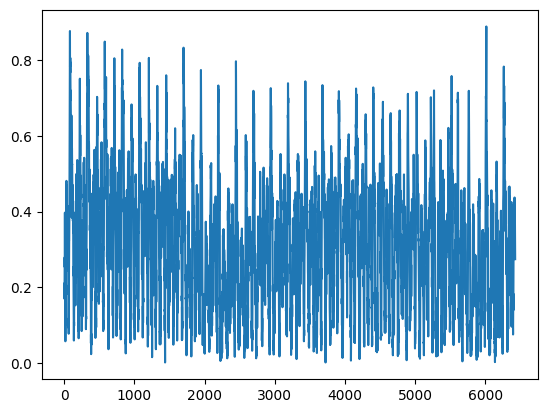

In [417]:
df_water['speed'].quantile(0.25)

In [418]:
def diff(x):
    return np.minimum(
        np.abs(x.values[1:] - x.values[:-1]),
        np.abs(x.values[1:] - x.values[:-1] + 360),
        np.abs(x.values[1:] - x.values[:-1] - 360))

wind_speed_by_date = df_wind.groupby('day')['speed'].mean()
wind_delta_dir_by_date = df_wind.groupby('day')['dir'].apply(lambda x: np.mean(diff(x))) # mean delta dir per 6 mins

water_speed_by_date = df_water.groupby('day')['speed'].mean()
water_delta_dir_by_date = df_water.groupby('day')['dir'].apply(lambda x: np.mean(diff(x))) # mean delta dir per 6 mins

def select(df, cond):
    selected = df[(df > df.quantile(q_min)) & (df < df.quantile(q_max))]
    mean = selected.mean()
    std = selected.std()
    return mean, std


for q in [(0, .25),(.1,.5)]:
    (q_min, q_max) = q

    df = wind_delta_dir_by_date
    cond = (df > df.quantile(q_min)) & (df < df.quantile(q_max))
    mean, std = select(wind_delta_dir_by_date, cond)
    print(f'{q_min:.0%} -> {q_max:.0%}:')
    print(f'\twind_delta_dir: {mean:.2f} ± {std:.2f} deg')
    mean, std = select(wind_speed_by_date, cond)
    print(f'\twind_speed: {mean:.2f} ± {std:.2f} m/s')


    df = water_speed_by_date
    cond = (df > df.quantile(q_min)) & (df < df.quantile(q_max))
    mean, std = select(water_delta_dir_by_date, cond)
    print(f'\twater_delta_dir: {mean:.2f} ± {std:.2f} deg')
    mean, std = select(water_speed_by_date, cond)
    print(f'\twater_speed: {mean:.2f} ± {std:.2f} m/s')


0% -> 25%:
	wind_delta_dir: 15.95 ± 3.16 deg
	wind_speed: 2.16 ± 0.36 m/s
	water_delta_dir: 16.16 ± 1.37 deg
	water_speed: 0.26 ± 0.02 m/s
10% -> 50%:
	wind_delta_dir: 20.89 ± 3.19 deg
	wind_speed: 2.44 ± 0.11 m/s
	water_delta_dir: 18.05 ± 1.30 deg
	water_speed: 0.29 ± 0.02 m/s


In [434]:
np.concatenate(df_wind.groupby('day')['dir'].apply(lambda x: diff(x)).values).shape

(6428,)

In [440]:
df_wind['speed'].groupby(df_wind['day']).apply(lambda x: x[1:]).values.shape

(6428,)

In [469]:
def diff(x):
    return np.minimum(
        np.abs(x.values[1:] - x.values[:-1]),
        np.abs(x.values[1:] - x.values[:-1] + 360),
        np.abs(x.values[1:] - x.values[:-1] - 360))

wind_speed = df_wind['speed'].groupby(df_wind['day']).apply(lambda x: x[1:]).values
wind_delta_dir = np.concatenate(df_wind.groupby('day')['dir'].apply(lambda x: diff(x)).values) # mean delta dir per 6 mins

water_speed = df_water['speed'].groupby(df_water['day']).apply(lambda x: x[1:]).values
water_delta_dir = np.concatenate(df_water.groupby('day')['dir'].apply(lambda x: diff(x)).values) # mean delta dir per 6 mins

def select(x, cond):
    selected = x[(x > np.quantile(x, q_min)) & (x < np.quantile(x, q_max))]
    mean = selected.mean()
    std = selected.std()
    return mean, std


for i, q in enumerate([(.0, .25),(.25, .5),(.5, .75)]):
    (q_min, q_max) = q

    x = wind_delta_dir
    cond = (x > np.quantile(x, q_min)) & (x < np.quantile(x, q_max))

    mean_wind_speed, std_wind_speed = select(wind_speed, cond)
    mean_wind_delta_dir, _ = select(wind_delta_dir, cond)
    print(f'''class WindScenario{i+1}Generator(OscillationForceGenerator):
    # {q_min:.0%} -> {q_max:.0%}:
    def __init__(self, wind_theta, wind_speed):
        super().__init__(wind_theta,
                         force_speed={mean_wind_speed:.2f},
                         sigma_dir=np.deg2rad({mean_wind_delta_dir:.2f}) / 2,
                         sigma_speed={std_wind_speed:.2f} / 2)
    ''')
    mean_water_speed, std_water_speed = select(water_speed, cond)
    mean_water_delta_dir, _ = select(water_delta_dir, cond)
    print(f'''class WaterCurrentScenario{i+1}Generator(OscillationForceGenerator):
    # {q_min:.0%} -> {q_max:.0%}:
    def __init__(self, water_current_theta, water_current_speed):
        super().__init__(water_current_theta,
                         force_speed={mean_water_speed:.2f},
                         sigma_dir=np.deg2rad({mean_water_delta_dir:.2f}) / 2,
                         sigma_speed={std_water_speed:.2f} / 2)
    ''')


class WindScenario1Generator(OscillationForceGenerator):
    # 0% -> 25%:
    def __init__(self, wind_theta, wind_speed):
        super().__init__(wind_theta,
                         force_speed=0.81,
                         sigma_dir=np.deg2rad(2.42) / 2,
                         sigma_speed=0.34 / 2)
    
class WaterCurrentScenario1Generator(OscillationForceGenerator):
    # 0% -> 25%:
    def __init__(self, water_current_theta, water_current_speed):
        super().__init__(water_current_theta,
                         force_speed=0.10,
                         sigma_dir=np.deg2rad(1.00) / 2,
                         sigma_speed=0.04 / 2)
    
class WindScenario2Generator(OscillationForceGenerator):
    # 25% -> 50%:
    def __init__(self, wind_theta, wind_speed):
        super().__init__(wind_theta,
                         force_speed=1.95,
                         sigma_dir=np.deg2rad(8.27) / 2,
                         sigma_speed=0.28 / 2)
    
class WaterCurrentScenario2Gene

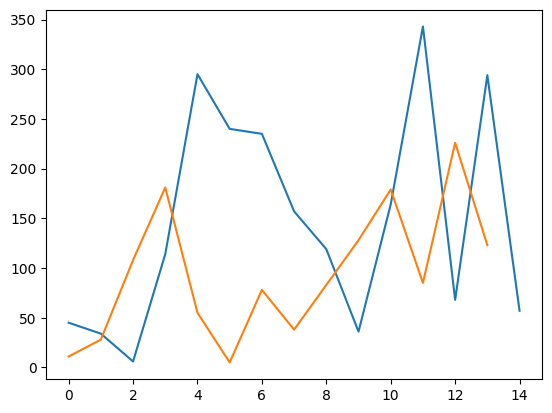

In [378]:
# df_wind[df_wind['day']==6]['dir'].plot()
x = df_wind[df_wind['day']==6]['dir'].iloc[15:30]

# plt.plot(x.diff().abs().values)
plt.plot(x.values)
plt.plot(np.minimum(
    np.abs(x.values[1:] - x.values[:-1]),
    np.abs(x.values[1:] - x.values[:-1] + 360),
    np.abs(x.values[1:] - x.values[:-1] - 360)))
# x.values[1:] - x.values[:-1]

In [385]:
def diff(x):
    return np.minimum(
        np.abs(x.values[1:] - x.values[:-1]),
        np.abs(x.values[1:] - x.values[:-1] + 360),
        np.abs(x.values[1:] - x.values[:-1] - 360))

wind_delta_dir_by_date = df_wind.groupby('day')['dir'].apply(lambda x: np.mean(diff(x))) # mean delta dir per 6 mins

for q in [-.1, .5, .90]:
    if q < 0:
        selected = wind_delta_dir_by_date[wind_delta_dir_by_date < wind_delta_dir_by_date.quantile(-q)]
    else:
        selected = wind_delta_dir_by_date[wind_delta_dir_by_date > wind_delta_dir_by_date.quantile(q)]
    mean = selected.mean()
    std = selected.std()
    print(f'[{q:3.0%}]: {mean:.2f} ± {std:.2f} deg')

[-10%]: 12.06 ± 1.74 deg
[50%]: 38.99 ± 12.25 deg
[90%]: 57.20 ± 5.28 deg


In [331]:
water_speed_by_date = df_water.groupby('day')['speed'].mean()

for q in [-.1, .5, .90]:
    if q < 0:
        selected = water_speed_by_date[water_speed_by_date < water_speed_by_date.quantile(-q)]
    else:
        selected = water_speed_by_date[water_speed_by_date > water_speed_by_date.quantile(q)]
    mean = selected.mean()
    std = selected.std()
    print(f'[{q:3.0%}]: {mean:.2f} ± {std:.2f} m/s')

[-10%]: 0.24 ± 0.01 m/s
[50%]: 0.35 ± 0.02 m/s
[90%]: 0.38 ± 0.01 m/s


In [386]:
water_delta_dir_by_date = df_water.groupby('day')['dir'].apply(lambda x: np.mean(diff(x))) # mean delta dir per 6 mins

for q in [-.1, .5, .90]:
    if q < 0:
        selected = water_delta_dir_by_date[water_delta_dir_by_date < water_delta_dir_by_date.quantile(-q)]
    else:
        selected = water_delta_dir_by_date[water_delta_dir_by_date > water_delta_dir_by_date.quantile(q)]
    mean = selected.mean()
    std = selected.std()
    print(f'[{q:3.0%}]: {mean:.2f} ± {std:.2f} deg')

[-10%]: 14.48 ± 0.67 deg
[50%]: 25.17 ± 3.30 deg
[90%]: 29.62 ± 3.01 deg


In [293]:
df_wind[df_wind['day']==1]['dir']

0      226.0
1      239.0
2      252.0
3      251.0
4      258.0
       ...  
235    262.0
236    249.0
237    257.0
238    237.0
239    261.0
Name: dir, Length: 240, dtype: float64

In [299]:
df_wind.groupby('date')['dir'].apply(lambda x: np.mean(np.abs(np.diff(x)))).mean()

31.173435234789004

In [ ]:
wind_speed_by_date = df_wind.groupby('date')['dir'].mean()

for q in [0, .5, .80]:
    selected = wind_speed_by_date[wind_speed_by_date > wind_speed_by_date.quantile(q)]
    mean = selected.mean()
    std = selected.std()
    print(f'[{q:3.0%}]: {mean:.2f} ± {std:.2f} m/s')

In [239]:
wind_mean = df_wind['speed'].mean()
wind_25 = df_wind['speed'].quantile(0.75)
wind_01 = df_wind['speed'].quantile(0.99)

wind_mean_std = df_wind['speed'].std()
wind_25_std = df_wind['speed'][df_wind['speed'] >= wind_25].std()
wind_01_std = df_wind['speed'][df_wind['speed'] >= wind_01].std()

print(f'wind_mean: {wind_mean:.2f} m/s')

728     7.8
738     8.6
966     7.6
1656    7.8
1658    8.7
       ... 
2150    7.6
2158    7.5
2163    7.5
3118    7.6
4302    8.5
Name: speed, Length: 71, dtype: float64

In [1]:
%pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.6/222.6 kB 21.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt

https://disc.gsfc.nasa.gov/datasets/M2T1NXSLV_5.12.4/summary?keywords=ocean
https://coastwatch.pfeg.noaa.gov/erddap/tabledap/nosCoopsCA.subset


In [216]:
for i in range(31):
    print(f'wget https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXSLV.5.12.4/2023/07/MERRA2_400.tavg1_2d_slv_Nx.202307{i:02d}.nc4')
    break

wget https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXSLV.5.12.4/2023/07/MERRA2_400.tavg1_2d_slv_Nx.20230700.nc4


In [193]:
nc = netCDF4.Dataset('/Users/lucasmrdt/Downloads/MERRA2_400.tavg1_2d_slv_Nx.20230801.nc4', mode='r')
nc.variables

# Cape Henry LB 2CH

AttributeError: 'dict' object has no attribute 'variables'

In [196]:
np.arctan2(v, u).shape[1:]

(361, 576)

In [116]:
means.shape, (maxs < 5).shape

((361, 576), (361, 576))

In [213]:
import numpy as np
import tqdm

u = np.array(nc.variables['U2M'])[:, 175, 263]
v = np.array(nc.variables['V2M'])[:, 175, 263]

thetas = np.rad2deg(np.arctan2(v, u) + np.pi)
deltas = np.abs((thetas[:-1,...] - thetas[1:,...]))

means = np.mean(deltas, axis=0)

q01 = np.quantile(means, .01)
q85 = np.quantile(means, .85)
q99 = np.quantile(means, .99)

q01_std = np.std(means[means < q01])
q85_std = np.std(means[means < q85])
q99_std = np.std(means[means < q99])

print(f'[1%] {q01:.2f}° ± {q01_std:.2f}°')
print(f'[85%] {q85:.2f}° ± {q85_std:.2f}°')
print(f'[99%] {q99:.2f}° ± {q99_std:.2f}°')

# nb_spikes = ((deltas[:-2,...] < deltas[1:-1,...]) & (deltas[1:-1,...] > deltas[2:,...])).sum(axis=0)

# print(np.quantile(nb_spikes, .01))
# print(np.quantile(nb_spikes, .85))
# print(np.quantile(nb_spikes, .99))

# # plt.plot(deltas[:, 20, 20])


# # # ((deltas[:-2, 20, 20] < deltas[1:-1, 20, 20]) & (deltas[1:-1, 20, 20] > deltas[2:, 20, 20])).sum()

# # ((deltas[:-2,...] < deltas[1:-1,...]) & (deltas[1:-1,...] > deltas[2:,...])).sum(axis=0).shape

[1%] 1.64° ± nan°
[85%] 1.64° ± nan°
[99%] 1.64° ± nan°


/Users/lucasmrdt/.brew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lucasmrdt/.brew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/lucasmrdt/.brew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [200]:
plt.

(24, 361, 576)

In [198]:
np.array(u.shape[1:])*np.array([.5, .625])

array([180.5, 360. ])

In [191]:
speeds = np.linalg.norm(np.stack([u, v], axis=-1), axis=-1)
# deltas = np.abs((speeds[:-1,...] - speeds[1:,...]))

means = np.mean(speeds, axis=0)

q01 = np.quantile(means, .01)
q85 = np.quantile(means, .85)
q99 = np.quantile(means, .99)

q01_std = np.std(means[means < q01])
q85_std = np.std(means[means < q85])
q99_std = np.std(means[means < q99])

print(f'[1%] {q01:.2f}m/s ± {q01_std:.2f}m/s')
print(f'[85%] {q85:.2f}m/s ± {q85_std:.2f}m/s')
print(f'[99%] {q99:.2f}m/s ± {q99_std:.2f}m/s')

[1%] 0.05m/s ± 0.02m/s
[85%] 9.08m/s ± 2.34m/s
[99%] 13.65m/s ± 3.11m/s


In [39]:
x = np.rad2deg(np.arctan2(winds[:,1], winds[:,0]))
np.abs((x - np.roll(x, 1))[1:]).max()

12.38101

In [212]:
(180-70.268333)//.625, (90+41.764167)//.5

(175.0, 263.0)

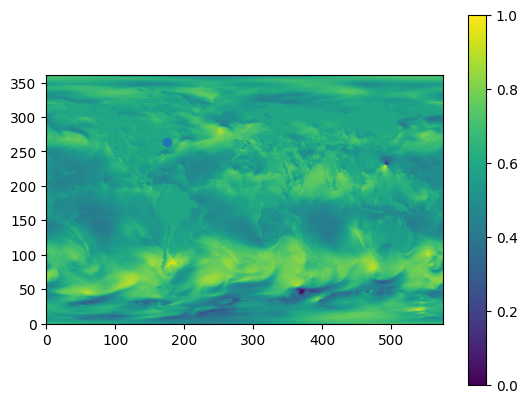

In [211]:
heat_map = nc.variables['U2M'][10]
plt.imshow(heat_map, origin='lower')
plt.scatter((180-70.268333)/.625, (90+41.764167)/.5)
plt.colorbar()